# Contents

## 1. Importing libraries and data
## 2. Data cleaning
## 3. Visual data exploration (scatterplot)
## 4. Hypothesis
## 5. Data prep for regression analysis
## 6. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure charts are displayed without the need to "call" them specifically
%matplotlib inline

In [3]:
# Define path
path = r'/Users/omid/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Analytics Immersion/Achievement 6/Soltani, Omid_2024-03_Open Project'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_data.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,rank,country_or_region,happiness_score,GDP_per_capita,social_support_score,life_expectancy,freedom_score,generosity_score,corruption_perception_score
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 2. Data cleaning

#### Extreme values checks

/var/folders/tt/_wyb66d571z8046p5nj36_500000gn/T/ipykernel_74317/2740050472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['happiness_score'], bins=20) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='happiness_score', ylabel='Density'>

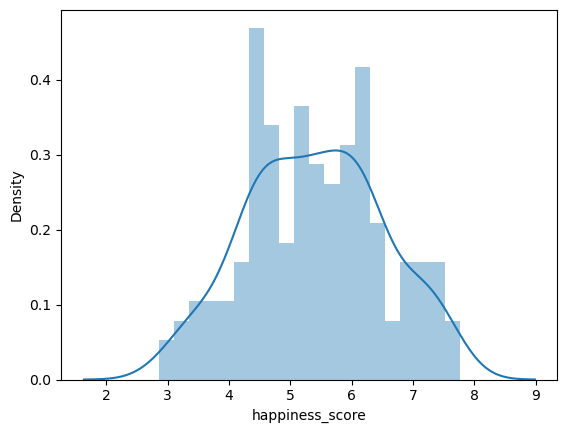

In [6]:
sns.distplot(df['happiness_score'], bins=20) # Shows extreme values

In [7]:
df['happiness_score'].mean() # Check the mean

5.407096153846155

In [8]:
df['happiness_score'].median() # Check the median

5.3795

In [9]:
df['happiness_score'].max() # Check the max

7.769

In [10]:
df['happiness_score'].min() # Check the min

2.853

**Interpretation**

In the realm of happiness scores, extreme values often represent valid data points, reflecting genuine variations in subjective well-being across different regions or countries. These outliers are not necessarily anomalies but rather indicate the diverse range of happiness levels influenced by various factors.

### 3. Visual data exploration (scatterplot)

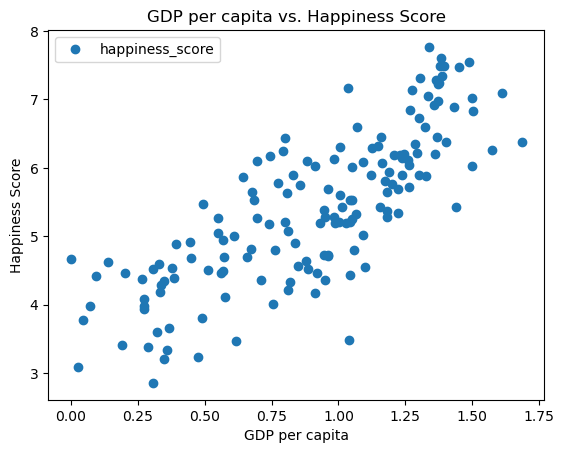

In [11]:
# Create a scatterplot using matplotlib plotting GDP per capita against happiness score
df.plot(x = 'GDP_per_capita', y = 'happiness_score', style='o')
plt.title('GDP per capita vs. Happiness Score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness Score')  
plt.show()

### 4. Hypothesis
- Null Hypothesis (H0): There is no significant correlation between a country's GDP per capita and its happiness score.
- Alternative Hypothesis (H1): Higher GDP per capita is associated with higher happiness scores across countries.

### 5. Data prep for regression analysis

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['GDP_per_capita'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

In [13]:
X

array([[1.34 ],
       [1.383],
       [1.488],
       [1.38 ],
       [1.396],
       [1.452],
       [1.387],
       [1.303],
       [1.365],
       [1.376],
       [1.372],
       [1.034],
       [1.276],
       [1.609],
       [1.333],
       [1.499],
       [1.373],
       [1.356],
       [1.433],
       [1.269],
       [1.503],
       [1.3  ],
       [1.07 ],
       [1.324],
       [1.368],
       [1.159],
       [0.8  ],
       [1.403],
       [1.684],
       [1.286],
       [1.149],
       [1.004],
       [1.124],
       [1.572],
       [0.794],
       [1.294],
       [1.362],
       [1.246],
       [1.231],
       [1.206],
       [0.745],
       [1.238],
       [0.985],
       [1.258],
       [0.694],
       [0.882],
       [1.092],
       [1.162],
       [1.263],
       [0.912],
       [1.5  ],
       [1.05 ],
       [1.187],
       [1.301],
       [1.237],
       [0.831],
       [1.12 ],
       [1.327],
       [0.642],
       [1.173],
       [0.776],
       [1.201],
       [

In [14]:
y

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [15]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6. Regression analysis

In [16]:
# Create a regression object
regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [17]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

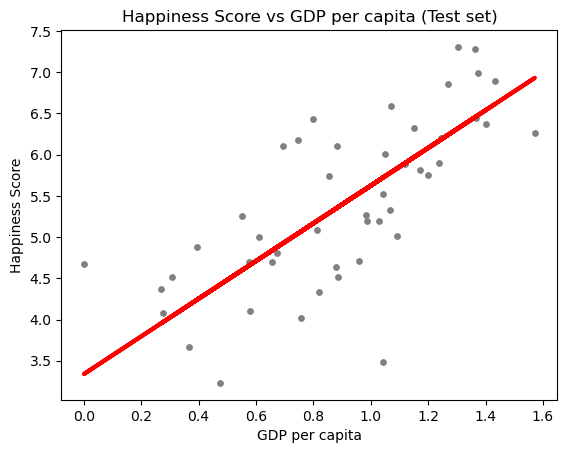

In [19]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs GDP per capita (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

**Interpretation**

The line appears to fit the data moderately well in the train set. The positive slope indicates a positive relationship between GDP per capita and happiness score, meaning that as GDP per capita increases, the happiness score tends to increase as well. This positive relationship aligns with common intuition and existing research findings that suggest higher economic prosperity is often associated with greater subjective well-being or happiness.

In [20]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [21]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.28560657]]
Mean squared error:  0.5168179896793244
R2 score:  0.4921825647047632


**Slope**: The slope of the fitted line is approximately 2.29. This indicates the rate of change in the dependent variable (happiness score) for a unit change in the independent variable (GDP per capita). 

**Mean Squared Error (MSE)**: The MSE is a measure of the average squared difference between the actual and predicted values. In this case, the MSE is approximately 0.52, indicating the average deviation of the data points from the fitted line.

**R-squared Score (R2)**: The R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Here, the R2 score is approximately 0.49, suggesting that around 49% of the variability in the happiness scores can be explained by the GDP per capita.

**Interpretation**

The line appears to fit the data moderately well in the train set. The positive slope indicates a positive relationship between GDP per capita and happiness score. However, the MSE indicates some degree of variability or dispersion of data points around the fitted line, suggesting that the model may not capture all the nuances of the relationship. The R2 score of approximately 0.49 indicates that nearly half of the variability in happiness scores can be explained by GDP per capita, which suggests a moderate level of predictive power. Overall, while the model provides some insights into the relationship between GDP per capita and happiness score, there may be other factors influencing happiness that are not accounted for in the model.

In [22]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.436,5.167462
1,5.893,6.166272
2,6.198,6.186843
3,4.639,5.348025
4,6.446,6.465687
5,7.307,6.317122
6,6.100,5.354882
7,4.707,5.533159
8,4.107,4.660058
9,6.174,5.041754


### Model Performance on Test Set

The model's performance on the test set appears to be reasonably good, although there is room for improvement. The mean squared error of 0.517 indicates that, on average, the model's predictions deviate from the actual values by approximately 0.72 units. The R-squared score of 0.492 suggests that the model explains about 49.2% of the variance in the happiness scores, which is relatively moderate.

The comparison between actual and predicted vlaues indicates that while the model generally captures the trends in the data, there are instances where the predicted values deviate significantly from the actual values. Further refinement of the model may be necessary to improve its accuracy and reliability.

### Reflections on Data Bias

When assessing the model's performance and its implications, it's essential to consider the possibility of data bias. Data bias can occur if the training data does not accurately represent the population or if certain groups are overrepresented or underrepresented in the dataset. In the context of predicting happiness scores, biases could arise from various factors such as cultural differences, socioeconomic disparities, and measurement errors in data collection.

It's crucial to critically evaluate the data sources, collection methods, and potential sources of bias to ensure that the model's predictions are reliable and unbiased. Additionally, ongoing monitoring and validation of the model's performance across different demographic groups can help identify and mitigate biases as necessary.